In [9]:
# Final Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)
  display(df.head())

Saving Globaldata.csv to Globaldata (1).csv
User uploaded file "Globaldata (1).csv" with length 513817 bytes


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [6]:
# Drop rows
df.dropna(how='all', inplace=True)

# Drop columns
threshold = (1 - 0.33) * len(df) # Change threshold to 33%
df.dropna(thresh=threshold, axis=1, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill values in numerical columns with the mean
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

display(df.head())

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [7]:
v_n=df.isnull().sum()
v_n

,0
Entity,0
Year,0
Access to electricity (% of population),0
Access to clean fuels for cooking,0
Renewable-electricity-generating-capacity-per-capita,0
Renewable energy share in the total final energy consumption (%),0
Electricity from fossil fuels (TWh),0
Electricity from nuclear (TWh),0
Electricity from renewables (TWh),0
Low-carbon electricity (% electricity),0


In [11]:
df.info

<bound method DataFrame.info of            Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
0                                                  9.22      
1                                                  8.86      
2                                                  8.47      
3                                                  8.09      
4                                                  7.75      
...                                                 ...      
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Renewable energy share in the total final energy consumption (%)  \
0                                                 44.99                  
1                                                 45.60                  
2                                                 37.83                  
3                                                 36.66                  
4                                                 44.24                  
...                                                 ...                  
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                    0.16                             0.0   
1                                    0.09                             0.0   
2                                    0.13                             0.0   
3                                    0.31                             0.0   
4                                    0.33                             0.0   
...                                   ...                             ...   
3644                                 3.50                             0.0   
3645                                 3.05                             0.0   
3646                                 3.73                             0.0   
3647                                 3.66                             0.0   
3648                                 3.40                             0.0   

      Electricity from renewables (TWh)  \
0                               

In [12]:
numerical_cols

Index(['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

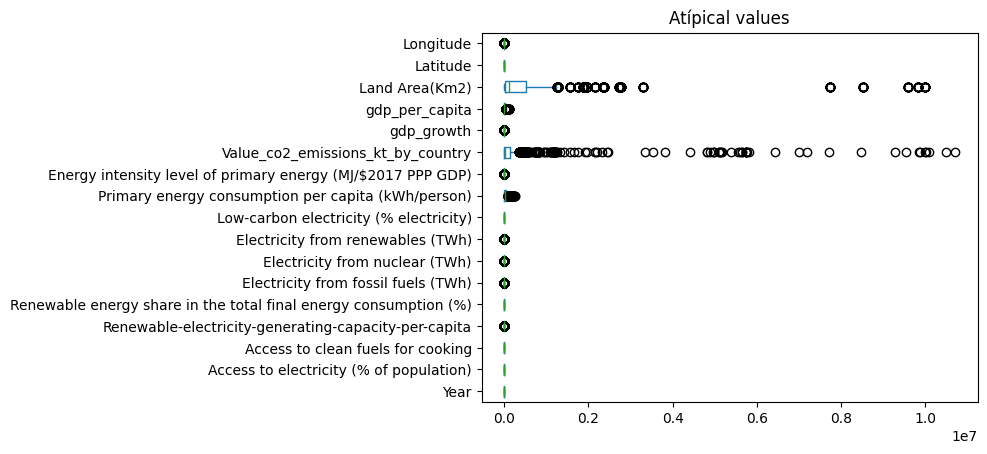

In [15]:
fig = plt.figure(figsize =(15, 8))
df[numerical_cols].plot(kind='box', vert=False)
plt.title("Atípical values")
plt.show()